In [1]:
import numpy as np
import matplotlib.pyplot as plt
# from TO_sim.Sol_Kuramoto import Sol_Kuramoto_r as sim
from TO_sim.Sol_Kuramoto import Sol_Kuramoto_r as sim
from TO_sim.Utility import Create_Folder
from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.Get_groups import phase_diagram
import parmap
import pandas as pd
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from tqdm.notebook import tqdm

In [6]:
N = 500
seed = 10
m = 6


In [30]:
dt = 0.05

In [9]:
Ks = np.arange(0,10+0.1/2,0.1)
df = pd.DataFrame({'r':[0],'rstd':[0],'g1':[0],'g2':[0],'g3':[0],'g4':[0],'g5':[0]
                   ,'g1_std':[0],'g2_std':[0],'g3_std':[0],'g4_std':[0],'g5_std':[0],'dt' : [dt],'K':Ks[0],'m':m})
df_Km = df.set_index(['K','m','dt'])

In [38]:
dt = 0.05
P_ = phase_diagram(seed = seed,N = N,m = m, t_end = 1000,dt = dt)

In [39]:
for K,test in zip(Ks,parmap.map(P_.make_meanr,Ks,sum_time =500, pm_pbar=False, pm_processes=8)):
    r,rstd,g,gstd =test
    temp = [r,rstd,*g,*gstd]
    df_Km.loc[(K,m,dt),:]=temp

In [25]:
Draw_ = DD(m)

In [13]:
A = df_Km.reset_index()

In [14]:
A[A.dt == 0.01]

,K,m,dt,r,rstd,g1,g2,g3,g4,g5,g1_std,g2_std,g3_std,g4_std,g5_std


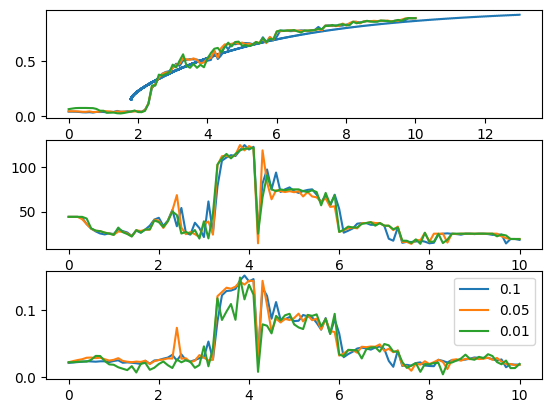

In [37]:
plt.figure()
plt.subplot(311)
Draw_.foward()
for i,dt in enumerate([0.1,0.05,0.01]):
    plt.subplot(311)

    r = df_Km.unstack().r.to_numpy().T[i]
    rstd = df_Km.unstack().rstd.to_numpy().T[i]
    g23 = df_Km.unstack().g2.to_numpy().T[i] + df_Km.unstack().g3.to_numpy().T[i]

    # plt.errorbar(Ks,r,rstd,label = f'{dt}')
    plt.plot(Ks,r,label = f'{dt}')
    plt.subplot(312)
    plt.plot(Ks,g23,label = f'{dt}')
    plt.subplot(313)
    plt.plot(Ks,rstd,label = f'{dt}')

plt.legend()